In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [10]:
sns.set(style="whitegrid")
steam_df = pd.read_csv("steam_games.csv") 

1. Opis zbioru danych:

In [31]:
print("Rozmiar ramki danych:", steam_df.shape)
print("\nBrakujące dane w poszczególnych kolumnach:")
print(steam_df.isnull().sum())
print("\nTypy danych w poszczególnych kolumnach:")
for col in steam_df.columns: 
    print(f"{col}: {steam_df[col].dtype}")

Rozmiar ramki danych: (71429, 21)

Brakujące dane w poszczególnych kolumnach:
steam_appid            0
name                   0
developers             0
publishers             0
categories             0
genres                 0
required_age           0
n_achievements         0
platforms              0
is_released            0
release_date           0
additional_content     0
total_reviews          0
total_positive         0
total_negative         0
review_score           0
review_score_desc      0
positive_percentual    0
metacritic             0
is_free                0
price_initial (USD)    0
dtype: int64

Typy danych w poszczególnych kolumnach:
steam_appid: int64
name: object
developers: object
publishers: object
categories: object
genres: object
required_age: int64
n_achievements: int64
platforms: object
is_released: bool
release_date: object
additional_content: object
total_reviews: int64
total_positive: int64
total_negative: int64
review_score: float64
review_score_desc: object


2. Analiza zmiennych:

In [32]:
print("\nStatystyki wybranych kolumn:")
print(steam_df.describe(include = [np.number]))


Statystyki wybranych kolumn:
        steam_appid  required_age  n_achievements  total_reviews  \
count  7.142900e+04  71429.000000    71429.000000   7.142900e+04   
mean   1.613700e+06      2.573227       16.079478   4.102497e+02   
std    8.625559e+05     13.591997      138.084319   8.389934e+03   
min    7.300000e+02      0.000000        0.000000   0.000000e+00   
25%    9.296400e+05      0.000000        0.000000   0.000000e+00   
50%    1.533470e+06      0.000000        0.000000   2.000000e+00   
75%    2.383530e+06      0.000000       16.000000   1.900000e+01   
max    3.430140e+06     97.000000     9821.000000   1.279700e+06   

       total_positive  total_negative  review_score  positive_percentual  \
count    7.142900e+04    71429.000000  71429.000000         71429.000000   
mean     3.602238e+02       50.025886      2.192849            46.113290   
std      7.409672e+03     1171.055349      3.175885            41.961702   
min      0.000000e+00        0.000000      0.000000  

Wnioski:<br>
- możemy zaobserwować duże różnice w czasie gry i ocenach<br>
- większość gier ma bardzo mało opinii lub nie ma ich wcale

3. Zależność grupowania według gatunków, analizując średni czas gry i oceny:

In [36]:
steam_df['main_genre'] = steam_df['genres'].str.split(';').str[0]
grouped = steam_df.groupby('main_genre')[['total_positive', 'total_negative']].mean().sort_values(by = 'total_positive', ascending = False)
print("\nPogrupowane według gatunku:")
print(grouped)


Pogrupowane według gatunku:
                                                    total_positive  \
main_genre                                                           
['Casual', 'Indie', 'Animation & Modeling', 'De...   195460.000000   
['Action', 'Casual', 'Indie', 'Massively Multip...    31360.500000   
['Action', 'Adventure', 'Massively Multiplayer'...    29057.666667   
['Action', 'Adventure', 'Massively Multiplayer'...    22377.250000   
['Action', 'Indie', 'Massively Multiplayer', 'R...    19694.000000   
...                                                            ...   
['Casual', 'Free To Play', 'Education']                   0.000000   
['Casual', 'Free To Play', 'Education', 'Softwa...        0.000000   
['Casual', 'Free To Play', 'Audio Production', ...        0.000000   
['Casual', 'Free To Play', 'Animation & Modelin...        0.000000   
['Adventure', 'Indie', 'Massively Multiplayer',...        0.000000   

                                                    total_ne

Wnioski: <br>
- niektóre gatunki, takie jak Akcja i RPG, mają tendencję do wyższych średnich ocen

4. Jeden wykres analizujący:

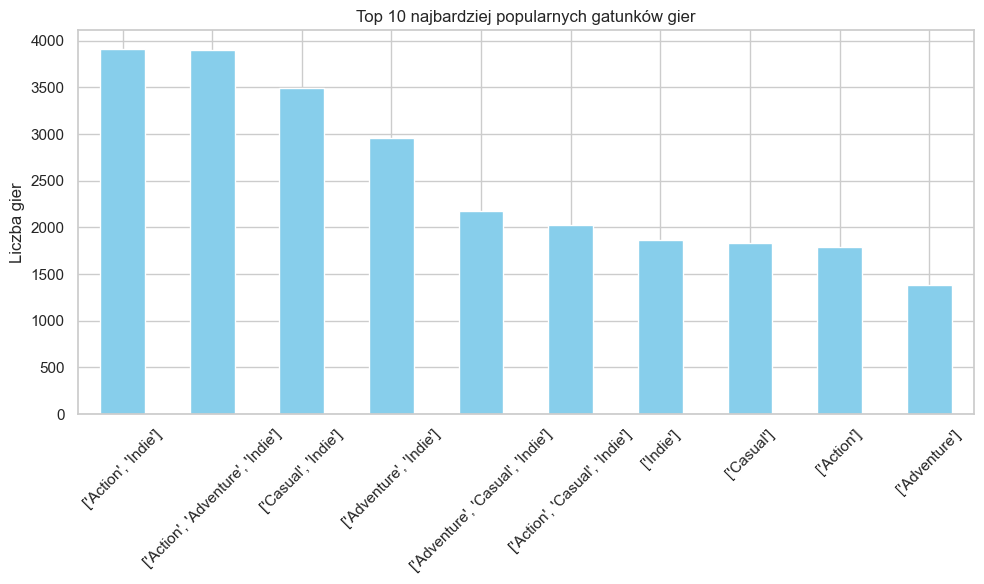

In [33]:
all_genres = steam_df['genres'].dropna().str.split(';').sum()
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending = False)

plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind = 'bar', color = 'skyblue')
plt.title("Top 10 najbardziej popularnych gatunków gier")
plt.ylabel("Liczba gier")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Wnioski:<br>
- Action, Indie, i Adventure są najbardziej popularnymi gatunkami 


5. Dwa wykresy zależności między wybranymi zmiennymi:

a) Wykres zależności ocen użytkowników od ceny:

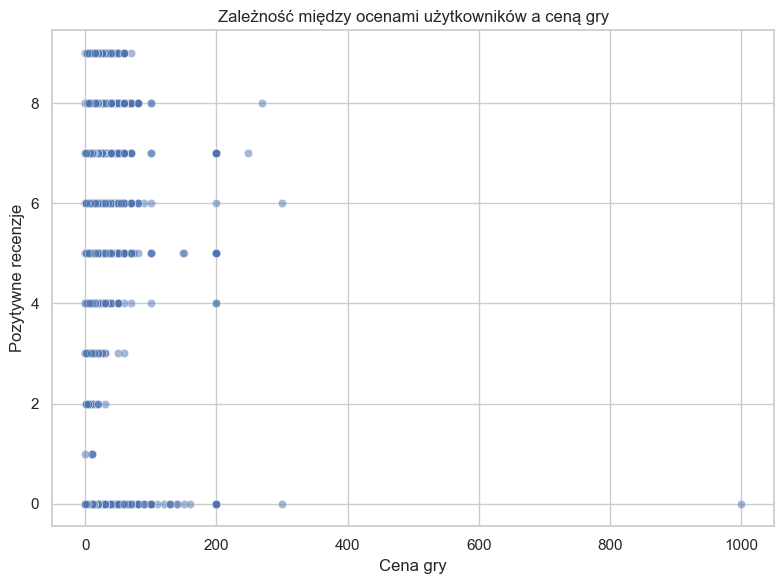

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=steam_df, x='price_initial (USD)', y='review_score', alpha=0.5)
plt.title("Zależność między ocenami użytkowników a ceną gry")
plt.xlabel("Cena gry")
plt.ylabel("Pozytywne recenzje")
plt.tight_layout()
plt.show()

Wnioski: <br>
- najdroższa gra ma ocenę 0 <br>
- średnie z opinii oscylują w okolicach 6, główne skupienie ocen jest między 4 a 8

b) Wykres zależności średniego procentu pozytywnych ocen od tego, czy gra jest darmowa:

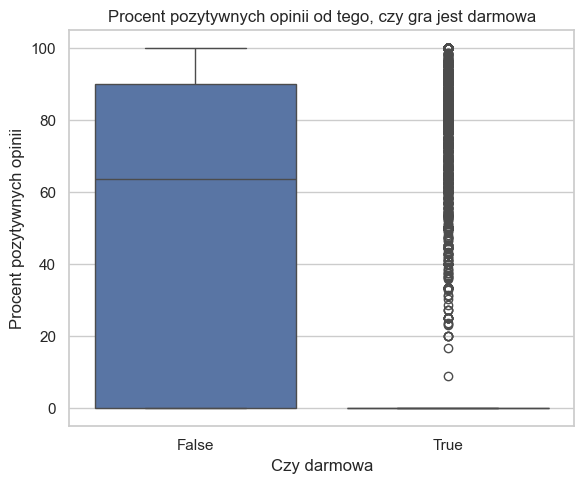

In [27]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=steam_df, x='is_free', y='positive_percentual')
plt.title('Procent pozytywnych opinii od tego, czy gra jest darmowa')
plt.xlabel('Czy darmowa')
plt.ylabel('Procent pozytywnych opinii')
plt.tight_layout()
plt.show()

Wnioski:<br>
- gry płatne są częściej lepiej oceniane, prawdopodobnie ze względu na wyższą jakość, większe budżety produkcyjne lub lepsze dopracowanie.<br>
- gry darmowe są bardzo zróżnicowane – część może być wysokiej jakości, ale wiele z nich otrzymuje bardzo niskie oceny.